<a href="https://colab.research.google.com/github/aliakbarbadri/mlp-classifier-adult-dataset/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# 1. Load the data

In [0]:
header = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 
                  'capital-loss', 'hours-per-week', 'native-country', 'salary']
try:
  df_temp = pd.read_csv("adults.csv",index_col=False, skipinitialspace=True,header=None,names=header)
except:
  df_temp = pd.read_csv("https://raw.githubusercontent.com/aliakbarbadri/mlp-classifier-adult-dataset/master/adults.csv", index_col=False, skipinitialspace=True,header=None,names=header)

In [0]:
df = df_temp

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df.shape

(48842, 15)

In [30]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

# 2. Preprocessing

## 2.1. Drop rows with NaN value

### 2.1.1. change ? to np.nan

In [31]:
df = df.replace('?', np.nan)
df[pd.isnull(df).any(axis=1)].shape

(3620, 15)

### 2.1.2. Drop rows containing nan

In [32]:
print(df.shape)

(48842, 15)


In [0]:
df.dropna(inplace=True)

In [34]:
df.shape

(45222, 15)

## 2.2. Deal with categorical columns

categorical columns
- workclass         
- education
- education-num         
- marital-status    
- occupation        
- relationship      
- race              
- sex               
- native-country    
- salary            



### 2.2.1. drop the education-num column because there is education column

In [0]:
df.drop('education-num', axis=1, inplace=True)

### 2.2.2. convert categoricals to numerical

In [0]:
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
label_column = ['salary']

In [37]:
def show_unique_values(columns):
  for column in columns:
    uniq = df[column].unique().tolist()
    print(column+ " has "+ str(len(uniq)) +" values" + " : " + str(uniq))
show_unique_values(categorical_columns)
show_unique_values(label_column)

workclass has 7 values : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay']
education has 16 values : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
marital-status has 7 values : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation has 14 values : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship has 6 values : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race has 5 values : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex has 2 values : ['Male', 'Femal

#### 2.2.2.1. convert to int

In [38]:
def convert_to_int(columns):
  for column in columns:
    unique_values = df[column].unique().tolist()
    dic = {}
    for indx, val in enumerate(unique_values):
      dic[val]=indx
    df[column] = df[column].map(dic).astype(int)
    print(column + " done!")
convert_to_int(label_column)
show_unique_values(label_column)

salary done!
salary has 2 values : [0, 1]


#### 2.2.2.2. convert to one-hot (good one)

In [0]:
def convert_to_onehot(data,columns):
  dummies = pd.get_dummies(data[columns])
  data = data.drop(columns, axis=1)
  data = pd.concat([data, dummies], axis=1)
  return data

In [0]:
df = convert_to_onehot(df,categorical_columns)

In [41]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df.shape

(45222, 104)

## 2.3. Normalize

Numerical columns:
- age
- fnlwgt
- capital-gain
- capital-loss
- hours-per-week

In [0]:
normalize_columns = ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']

In [0]:
def show_values(columns):
  for column in columns:
    max_val = df[column].max()
    min_val = df[column].min()
    mean_val = df[column].mean()
    var_val = df[column].var()
    print(column +': values=['+str(min_val)+','+str(max_val)+'] , mean='+str(mean_val)+' , var='+str(var_val))

In [45]:
show_values(normalize_columns)

age: values=[17,90] , mean=38.547941267524656 , var=174.7120931277955
fnlwgt: values=[13492,1490400] , mean=189734.7343107337 , var=11159639548.606026
capital-gain: values=[0,99999] , mean=1101.4303436380524 , var=56346492.60217762
capital-loss: values=[0,4356] , mean=88.595418159303 , var=163989.43649575836
hours-per-week: values=[1,99] , mean=40.93801689443191 , var=144.18025389435846


In [46]:
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  df[columns] = scaler.fit_transform(df[columns])
normalize(normalize_columns)
show_values(normalize_columns)

age: values=[-1.6302308284607552,3.8926564395212115] , mean=-1.1624051271159966e-16 , var=1.000022113619715
fnlwgt: values=[-1.668364500112278,12.312472138449555] , mean=3.628012538621557e-17 , var=1.0000221136197647
capital-gain: values=[-0.14673320201326512,13.175192739902075] , mean=-6.303170802072809e-16 , var=1.000022113619192
capital-loss: values=[-0.21878025661034578,10.538060419744602] , mean=1.0164535909113766e-15 , var=1.0000221136201082
hours-per-week: values=[-3.326123764725461,4.835526569709145] , mean=1.3492958611604663e-15 , var=1.0000221136194827


In [47]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.034201,-1.062295,0.142888,-0.21878,-0.078120,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.866417,-1.007438,-0.146733,-0.21878,-2.326738,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.041455,0.245284,-0.146733,-0.21878,-0.078120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.093385,0.425853,-0.146733,-0.21878,-0.078120,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.798015,1.407393,-0.146733,-0.21878,-0.078120,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2.4. Split the data to train, validation and test

In [48]:
from sklearn.model_selection import train_test_split

x_data = df.drop('salary',axis=1)
y_labels = df['salary']

X_train_full, X_test, y_train_full, y_test = train_test_split(x_data,y_labels,test_size=0.2,random_state=101)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=101)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(28941, 103) (28941,)
(7236, 103) (7236,)
(9045, 103) (9045,)


# Model

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# model = tf.keras.models.Sequential([
#   tf.keras.layers.DenseFeatures(feature_columns=X_train.columns.tolist()),
#   tf.keras.layers.Dense(units=128, activation='relu'),
#   tf.keras.layers.Dropout(rate=0.2),
#   tf.keras.layers.Dense(units=128, activation='relu'),
#   tf.keras.layers.Dense(units=2, activation='sigmoid')
# ])

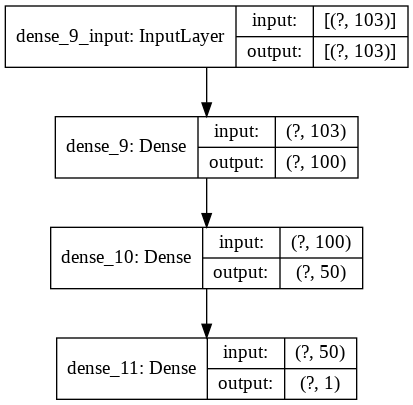

In [62]:
keras.utils.plot_model(model, "my_adult_salary_model.png", show_shapes=True)

In [0]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy","Precision","Recall"])


In [64]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
905/905 [==============================] - 2s 3ms/step - loss: 0.3438 - accuracy: 0.8359 - precision: 0.7085 - recall: 0.5785 - val_loss: 0.3175 - val_accuracy: 0.8514 - val_precision: 0.7109 - val_recall: 0.6399
Epoch 2/30
905/905 [==============================] - 2s 2ms/step - loss: 0.3161 - accuracy: 0.8541 - precision: 0.7412 - recall: 0.6356 - val_loss: 0.3191 - val_accuracy: 0.8489 - val_precision: 0.7329 - val_recall: 0.5811
Epoch 3/30
905/905 [==============================] - 2s 3ms/step - loss: 0.3116 - accuracy: 0.8546 - precision: 0.7427 - recall: 0.6361 - val_loss: 0.3134 - val_accuracy: 0.8532 - val_precision: 0.7306 - val_recall: 0.6134
Epoch 4/30
905/905 [==============================] - 2s 2ms/step - loss: 0.3075 - accuracy: 0.8580 - precision: 0.7510 - recall: 0.6418 - val_loss: 0.3168 - val_accuracy: 0.8538 - val_precision: 0.7451 - val_recall: 0.5920
Epoch 5/30
905/905 [==============================] - 2s 2ms/step - loss: 0.3040 - accuracy: 0.8603 - pr

In [65]:
model.evaluate(X_test, y_test)

283/283 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8456 - precision: 0.7240 - recall: 0.6237


[0.41106799244880676,
 0.845550000667572,
 0.7239795923233032,
 0.6237362623214722]